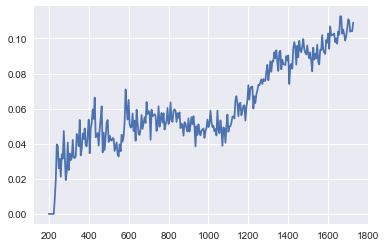

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from id3 import id3, predict

if __name__ == '__main__':
    ttt_df = pd.read_csv('car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
    target = np.array(ttt_df['class'].values)
    ttt_df.drop('class', axis=1, inplace=True)
    feature_names = np.array(ttt_df.columns.values)
    data = ttt_df.values

    cnt = []
    err = []
    for i in range(200, len(data), 5):
        errors = []
        for _ in range(10):
            sl_data = data[:i]
            sl_tgt = target[:i]
            x_train, x_test, y_train, y_test = train_test_split(sl_data, sl_tgt, test_size=0.20)
            tree = id3(x_train, y_train, feature_names)
            # pretty_print_tree(tree)
            y_pred = predict(tree, feature_names, x_test)
            error = 0
            for p, t in zip(y_pred, y_test):
                if p != t:
                    error += 1
            errors.append(error/len(y_pred))
        cnt.append(i)
        err.append(sum(errors)/len(errors))

    sns.set()
    plt.plot(cnt, err)
    plt.show()